<a href="https://colab.research.google.com/github/ansh-g-01/Cryptography/blob/main/Crypto_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ansh Gandhi

#Casear, Vignere, Playfair, Hill Cipher


In [ ]:
#Casesar Cipher
def encrypt():
  msg=input("Enter message to encrypt: ")
  ciphertext=""
  for i in range(len(msg)):
    if msg[i]==" ":
      ciphertext+=" "
    else:
      ciphertext+=chr(ord(msg[i])+3)
  print("Encrypted message is: ",ciphertext)

def decrypt():
  ciphertext=input("Enter message to be decrypt: ")
  msg=""
  for i in range(len(ciphertext)):
    if ciphertext[i]==" ":
      msg+=" "
    else:
      msg+=chr(ord(ciphertext[i])-3)
  print("Encrypted message is: ",msg)

encrypt()
decrypt()

Enter message to encrypt: Ansh Nirmal Gandhi
Encrypted message is:  Dqvk Qlupdo Jdqgkl
Enter message to be decrypt: Dqvk Qlupdo Jdqgkl
Encrypted message is:  Ansh Nirmal Gandhi


In [ ]:
#Vigenere Cipher
def encrypt():
  key=input("Enter key: ")
  keylist=[ord(i)-97 for i in key]#converting to 0 to 25 ki values
  msg=input("Enter message to encrypt: ")
  ciphertext=""
  total=len(key)
  counter=0 #to iterate through keylist
  for i in msg:
    if i==" ":
      ciphertext+=" "
    else:
      num=((ord(i)-97)+keylist[counter])%26  #adding key to cipher text with modulo to prevent overflow
      ciphertext+=chr(97+num)
      counter=(counter+1)%total
  print(ciphertext)

def decrypt():
  key=input("Enter key: ")
  keylist=[ord(i)-97 for i in key]#converting to 0 to 25 ki values
  ciphertext=input("Enter cipher text to decrypt: ")
  msg=""
  total=len(key)
  counter=0 #to iterate through keylist
  for i in ciphertext:
    if i==" ":
      msg+=" "
    else:
      num=((ord(i)-97)-keylist[counter])%26  #adding key to cipher text with modulo to prevent overflow
      msg+=chr(97+num)
      counter=(counter+1)%total
  print(msg)



encrypt()
decrypt()

Enter key: a
Enter message to encrypt: a
a
Enter key: deceptive
Enter cipher text to decrypt: zicvtwqngrzgvtw
wearediscovered


In [ ]:
print(ord('a'))

97


In [ ]:
print("Caution: Dont enter J in key or in message")
def generate_playfair_matrix(key):
  matrix =[ i for i in key]
  alph ="abcdefghiklmnopqrstuvwxyz"
  for i in alph:
    if i not in key:
      matrix.append(i)
  matrix = [matrix[i*5:i*5+5] for i in range(5)]
  return matrix

def preprocess_message(message):
    message = message.replace("j", "i")  # Playfair replaces 'j' with 'i'
    for i in range(len(message)-1):
      if message[i]==message[i+1]:
        message=message[0:i+1] +"x"+ message[i+1:]
    if len(message)%2 !=0:
      message+="z"
    return message

def find_position(matrix, char):
    for row in range(5):
        for col in range(5):
            if matrix[row][col] == char:
                return row, col
    return None  # This should never happen in Playfair

def encrypt_pair(matrix, char1, char2):
    row1, col1 = find_position(matrix, char1)
    row2, col2 = find_position(matrix, char2)

    if row1 == row2:  # Same row: Shift right
        encrypted_char1 = matrix[row1][(col1 + 1) % 5]
        encrypted_char2 = matrix[row2][(col2 + 1) % 5]

    elif col1 == col2:  # Same column: Shift down
        encrypted_char1 = matrix[(row1 + 1) % 5][col1]
        encrypted_char2 = matrix[(row2 + 1) % 5][col2]

    else:  # Rectangle rule: Swap column indices
        encrypted_char1 = matrix[row1][col2]
        encrypted_char2 = matrix[row2][col1]

    return encrypted_char1 + encrypted_char2
def decrypt_pair(matrix,char1, char2):
  row1, col1 = find_position(matrix, char1)
  row2, col2 = find_position(matrix, char2)

  if row1 == row2:  # Same row: Shift right
    encrypted_char1 = matrix[row1][(col1 - 1) % 5]
    encrypted_char2 = matrix[row2][(col2 - 1) % 5]

  elif col1 == col2:  # Same column: Shift down
    encrypted_char1 = matrix[(row1 - 1) % 5][col1]
    encrypted_char2 = matrix[(row2 - 1) % 5][col2]

  else:  # Rectangle rule: Swap column indices
    encrypted_char1 = matrix[row1][col2]
    encrypted_char2 = matrix[row2][col1]

  return encrypted_char1 + encrypted_char2


def encrypt(matrix):

    message = "instrumentsz"
    print(f"Entered message : {message}")
    message = preprocess_message(message)
    print(f"Processed message : {message}")

    encrypted_text = ""
    for i in range(0,len(message)-1,2):
      encrypted_pair = encrypt_pair(matrix, message[i],message[i+1])
      encrypted_text += encrypted_pair
      print(f"{message[i:i+2]} -> {encrypted_pair}")

    print("\nEncrypted Message:", encrypted_text)

def decrypt():
  de_text=input("Enter text to decrypt")
  decrypted_text = ""
  for i in range(0,len(de_text)-1,2):
    decrypted_pair = decrypt_pair(matrix, de_text[i],de_text[i+1])
    decrypted_text += decrypted_pair
    print(f"{de_text[i:i+2]} -> {decrypted_pair}")
  print("\nEncrypted Message:", decrypted_text)

key = "monarchy"
print(f"Entered key : {key}")
matrix = generate_playfair_matrix(key)

print("\nPlayfair Matrix:")
for row in matrix:
    print(row)
encrypt(matrix)
decrypt()


Caution: Dont enter J in key or in message
Entered key : monarchy

Playfair Matrix:
['m', 'o', 'n', 'a', 'r']
['c', 'h', 'y', 'b', 'd']
['e', 'f', 'g', 'i', 'k']
['l', 'p', 'q', 's', 't']
['u', 'v', 'w', 'x', 'z']
Entered message : instrumentsz
Processed message : instrumentsz
in -> ga
st -> tl
ru -> mz
me -> cl
nt -> rq
sz -> tx

Encrypted Message: gatlmzclrqtx
Enter text to decryptgatlmzclrqtx
ga -> in
tl -> st
mz -> ru
cl -> me
rq -> nt
tx -> sz

Encrypted Message: instrumentsz


In [62]:
import numpy as np

# Function to convert letter to number (A=0, ..., Z=25)
def letter_to_num(letter):
    return ord(letter) - ord('A')

# Function to convert number back to letter
def num_to_letter(num):
    return chr(num + ord('A'))

# Function to prepare a matrix for modular inverse
def mod_inverse_matrix(matrix, mod=26):
    det = int(round(np.linalg.det(matrix)))  # Compute determinant
    det_inv = pow(det, -1, mod)  # Modular inverse of determinant mod 26
    adjugate = np.round(det * np.linalg.inv(matrix)).astype(int) % mod  # Adjugate matrix
    return (det_inv * adjugate) % mod  # Final inverse matrix mod 26

# Function to encrypt plaintext using Hill Cipher
def hill_cipher_encrypt(plaintext, key_matrix):
    plaintext = plaintext.upper().replace(" ", "")  # Convert to uppercase & remove spaces
    size = len(key_matrix)  # Key matrix size (n×n)

    # Ensure plaintext length is a multiple of matrix size
    while len(plaintext) % size != 0:
        plaintext += 'X'  # Padding with 'X'

    encrypted_text = ""

    for i in range(0, len(plaintext), size):
        vector = [letter_to_num(plaintext[j]) for j in range(i, i + size)]  # Convert to numbers
        encrypted_vector = np.dot(key_matrix, vector) % 26  # Encrypt using matrix multiplication
        encrypted_text += "".join(num_to_letter(num) for num in encrypted_vector)  # Convert back to text

    return encrypted_text

# Function to decrypt ciphertext using Hill Cipher
def hill_cipher_decrypt(ciphertext, key_matrix):
    size = len(key_matrix)  # Key matrix size (n×n)
    inverse_key_matrix = mod_inverse_matrix(key_matrix, 26)  # Compute modular inverse of key matrix
    decrypted_text = ""

    for i in range(0, len(ciphertext), size):
        vector = [letter_to_num(ciphertext[j]) for j in range(i, i + size)]  # Convert to numbers
        decrypted_vector = np.dot(inverse_key_matrix, vector) % 26  # Decrypt using matrix multiplication
        decrypted_text += "".join(num_to_letter(num) for num in decrypted_vector)  # Convert back to text

    return decrypted_text

# Example Usage
key_matrix = np.array([[6, 24, 1], [13, 16, 10], [20, 17, 15]])  # 3x3 Key matrix (Must be invertible mod 26)
plaintext = "ACT"

# Encryption
encrypted_text = hill_cipher_encrypt(plaintext, key_matrix)
print("Encrypted Text:", encrypted_text)

# Decryption
decrypted_text = hill_cipher_decrypt(encrypted_text, key_matrix)
print("Decrypted Text:", decrypted_text)


Encrypted Text: POH
Decrypted Text: ACT


# RSA, ELGamal, Diffie Hieman, Mim


### 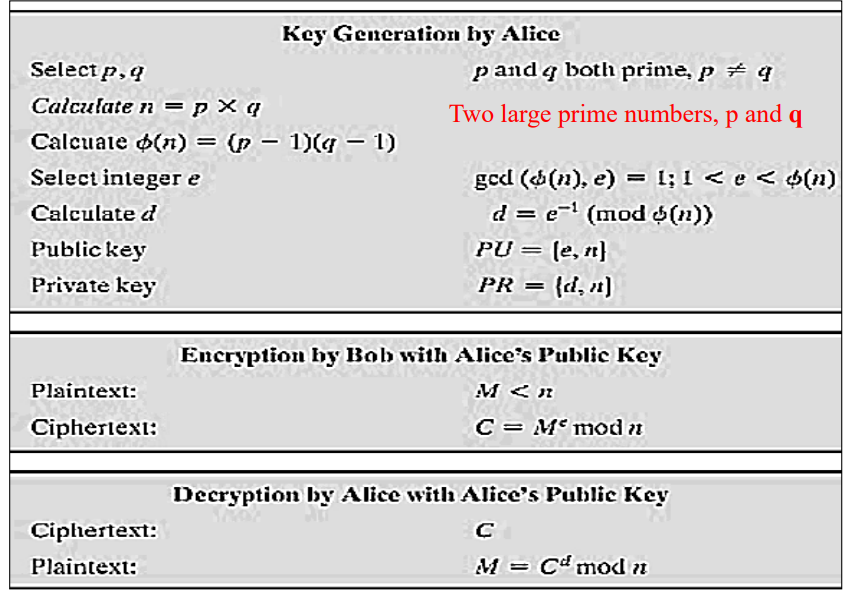

In [ ]:
#RSA


def encryption(e,n,M):

  cipher= pow(M,e,n)
  print(f"Cipher text is {cipher}")
  return cipher

def decryption(d,n,cipher):
  message= pow(cipher,d,n)
  print(f"Encrypted Message is {message}")



p = int(input("Enter value of p: "))# Should be prime
q= int(input("Enter value of q: ")) # should be prime


e= int(input("Enter value of e: ")) # Enter e , gcd(phi,e)=1
M=int(input("Enter message to encrypt M : "))
n= p*q
phi= (p-1)*(q-1)
d= pow(e,-1,phi)
print(f"\nPublic key is [{e},{n}]" )
print(f"Private key is [{d},{n}]")
cipher=encryption(e,n,M)
decryption(d,n,cipher)

Enter value of p: 17
Enter value of q: 11
Enter value of e: 7
Enter message to encrypt M : 88

Public key is [7,187]
Private key is [23,187]
Cipher text is 11
Encrypted Message is 88


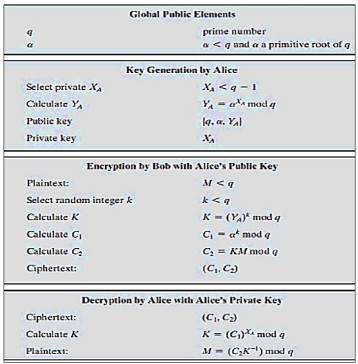

In [ ]:
# ELGAMAL
q=int(input("Enter value of q: "))
alpha=int(input("Enter value of alpha: "))
XA=int(input("Enter private key XA: "))
YA= pow(alpha,XA,q)
k=int(input("Enter random integer k: "))

def encrypt(q,alpha,k,YA):
  M=int(input("Enter message M: "))
  K=pow(YA,k,q)
  C1=pow(alpha,k,q)
  C2= (K*M)%q
  print(f"Cipher text is ({C1},{C2})")
  return (C1,C2)

def decrypt(cipher,XA,q):
  C1,C2 = cipher
  K=pow(C1,XA,q)
  M=(pow(K,-1,q)*C2)%q
  print(f"Decrypted message is {M}")

cipher=encrypt(q,alpha,k,YA)
decrypt(cipher,XA,q)

Enter value of q: 11
Enter value of alpha: 2
Enter private key XA: 3
Enter random integer k4
Enter message M: 7
Cipher text is (5,6)
Decrypted message is 7


In [ ]:
#Diffie hieman

q= int(input("Enter q : "))
alpha=int(input("Enter alpha: "))

XA= int(input("Enter private key of XA: "))

XB= int(input("Enter private key of XB: "))

YA =pow(alpha,XA,q)
YB =pow(alpha,XB,q)
print(f"Public key of A is {YA}")
print(f"Public key of B is {YB}")

K1=pow(YA,XB,q)
print(f"Shared key is {K1}")

Enter q : 11
Enter alpha: 6
Enter private key of XA: 2
Enter private key of XB: 3
Public key of A is 3
Public key of B is 7
Shared key is 5


In [ ]:
#Man in the Middle Attack

q= int(input("Enter q : "))
alpha=int(input("Enter alpha: "))

XA= int(input("Enter private key  XA: "))

XB= int(input("Enter private key  XB: "))

XD= int(input("Enter private key  XD: "))
YA =pow(alpha,XA,q)
YB =pow(alpha,XB,q)
YD= pow(alpha, XD,q)
print(f"Public key of A is {YA}")
print(f"Public key of B is {YB}")
print(f"Public key of D is {YD}")

K1= pow(YD,XA,q)
K2=pow(YD,XB,q)

print(f"Shared key is between A and D is  {K1}")
print(f"Shared key is between B and D is  {K2}")

Enter q : 23
Enter alpha: 3
Enter private key  XA: 6
Enter private key  XB: 10
Enter private key  XD: 7
Public key of A is 16
Public key of B is 8
Public key of D is 2
Shared key is between A and D is  18
Shared key is between B and D is  12


# EC2

In [ ]:
# User Input
a = int(input("Enter coefficient a: "))
b = int(input("Enter coefficient b: "))
p = int(input("Enter prime p: "))
# a=1
# b=1
# q=11
#functions
def is_on_curve(x, y):
    return (y**2)%p == (x**3 + a*x +b)%p

def add_points(P, Q):

    x1, y1 = P
    x2, y2 = Q

    if P == Q:
        # Slope for point doubling
        m = (3 * x1 ** 2 + a) * pow(2 * y1, -1, p)
    else:
        # Slope for point addition
        m = (y2 - y1) * pow(x2 - x1, -1, p)

    m = m %p
    x3 = (m ** 2 - x1 - x2) % p
    y3 = (m * (x1 - x3) - y1) % p

    return (x3, y3)

#############################################
# """ Program part 1, check if points Lie  on the Curve """

# P = eval(input("Enter point P : "))
# Q = eval(input("Enter point Q : "))
P=(5,25)
Q=(12,7)
P2 = add_points(P,Q)
print(P2)
is_on_curve(P2[0],P2[1])




# """ Program part 2, Generate points that Lie  on the Curve """
ans= [(i,j) for i in range(11) for j in range(11) if (i**3 + a*i + b)%q == (j**2)%q]
print(ans)



Enter coefficient a: 1
Enter coefficient b: 1
Enter prime p: 11
(6, 9)
[(0, 1), (0, 10), (1, 5), (1, 6), (2, 0), (3, 3), (3, 8), (4, 5), (4, 6), (6, 5), (6, 6), (8, 2), (8, 9)]


# DES AND AES


In [72]:
a="0x14"
print(a)
a=int(a,16)
print(a)
a=bin(a)
print(a)
a=a[2:]
print(a)
a=a.zfill(64)
print(a)

0x14
20
0b10100
10100
0000000000000000000000000000000000000000000000000000000000010100


In [64]:
#des
#pc1 and pc2 function
#left circular shift function and hex to binary function
#get 64 bit key , apply pc1 and convert to 56 bits
# split 56 bits in to co and do and do left circular shift
# join this key and apply pc2 on this
# your subkey for the specific round is ready


def hex_to_bin(hex_key):
    return bin(int(hex_key, 16))[2:].zfill(64) # convert the hex key to 64 bit binary (0 padding if necessary) key

def left_circular_shift(bits, shifts):
    return bits[shifts:] + bits[:shifts]

def pc1(key):
    pc1_table = [
        57, 49, 41, 33, 25, 17, 9, 1, 58, 50, 42, 34, 26, 18,
        10, 2, 59, 51, 43, 35, 27, 19, 11, 3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15, 7, 62, 54, 46, 38, 30, 22,
        14, 6, 61, 53, 45, 37, 29, 21, 13, 5, 28, 20, 12, 4
    ]
    return ''.join([key[i - 1] for i in pc1_table]) #i-1 because ith bit is on i-1th index. 0 index addressing
    # ''.join runs over an iterable and converts it in to a string with either nothing  '' in between or anything u put inside ' '

def pc2(key):
    pc2_table = [
        14, 17, 11, 24, 1, 5, 3, 28, 15, 6, 21, 10, 23, 19, 12, 4, 26, 8,
        16, 7, 27, 20, 13, 2, 41, 52, 31, 37, 47, 55, 30, 40, 51, 45, 33, 48,
        44, 49, 39, 56, 34, 53, 46, 42, 50, 36, 29, 32
    ]
    return ''.join([key[i - 1] for i in pc2_table])

def keygeneration(key):
    bin_key = hex_to_bin(key)
    key_56 = pc1(bin_key)

    rounds = [1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1]  # Corrected shift schedule

    left_key = key_56[:28]
    right_key = key_56[28:]

    for i in range(16):  # 16 rounds
        left_key = left_circular_shift(left_key, rounds[i])
        right_key = left_circular_shift(right_key, rounds[i])
        key_56 = left_key + right_key
        key_48 = pc2(key_56)
        print(f"Key for round {i+1}: {key_48}")

# Manual input or user input
key = " 133457799BBCDFF1"
print("56-bit Key after PC1:", pc1(hex_to_bin(key)))
keygeneration(key)


56-bit Key after PC1: 11110000110011001010101011110101010101100110011110001111
Key for round 1: 000110110000001011101111111111000111000001110010
Key for round 2: 011110011010111011011001110110111100100111100101
Key for round 3: 010101011111110010001010010000101100111110011001
Key for round 4: 011100101010110111010110110110110011010100011101
Key for round 5: 011111001110110000000111111010110101001110101000
Key for round 6: 011000111010010100111110010100000111101100101111
Key for round 7: 111011001000010010110111111101100001100010111100
Key for round 8: 111101111000101000111010110000010011101111111011
Key for round 9: 111000001101101111101011111011011110011110000001
Key for round 10: 101100011111001101000111101110100100011001001111
Key for round 11: 001000010101111111010011110111101101001110000110
Key for round 12: 011101010111000111110101100101000110011111101001
Key for round 13: 100101111100010111010001111110101011101001000001
Key for round 14: 01011111010000111011011111110010111001110

In [76]:
#aes
# S-box for SubWord step
# 128 bits - 10 rounds
# 192 bits - 12 rounds
# 256 buts - 14 rounds
SBOX = [
    # AES S-Box
    [0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76],
    [0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0],
    [0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15],
    [0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75],
    [0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84],
    [0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf],
    [0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8],
    [0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2],
    [0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73],
    [0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb],
    [0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79],
    [0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08],
    [0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a],
    [0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e],
    [0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf],
    [0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16]
]

RCON = [
    [0x00, 0x00, 0x00, 0x00],
    [0x01, 0x00, 0x00, 0x00],
    [0x02, 0x00, 0x00, 0x00],
    [0x04, 0x00, 0x00, 0x00],
    [0x08, 0x00, 0x00, 0x00],
    [0x10, 0x00, 0x00, 0x00],
    [0x20, 0x00, 0x00, 0x00],
    [0x40, 0x00, 0x00, 0x00],
    [0x80, 0x00, 0x00, 0x00],
    [0x1B, 0x00, 0x00, 0x00],
    [0x36, 0x00, 0x00, 0x00]
]

def key_expansion(key):
    expanded_keys = [key]
    result=[]
    add=[hex(i) for i in key]
    result.append(add) #added round 0 key
    for i in range(1, 11):
        temp = expanded_keys[-1][-4:]
        temp = temp[1:] + temp[:1]  # Rotate left
        temp = [SBOX[b >> 4][b & 0x0F] for b in temp]  # S-Box substitution
        temp[0] ^= RCON[i][0] # only xored with the first bit , because xor with 0 is the number itself
        # now temp becomes g(w3)
        new_key = [temp[j] ^ expanded_keys[-1][j] for j in range(4)]
        for j in range(4, 16):
            new_key.append(new_key[j - 4] ^ expanded_keys[-1][j])
        add=[hex(i) for i in new_key]
        expanded_keys.append(new_key)
        result.append(add)
    return result
initial_key=[0x54,0x68,0x61,0x74,0x73,0x20,0x6D,0x79,0x20,0x4B,0x75,0x6E,0x67,0x20,0x46,0x75]
#initial_key = [0x2b, 0x7e, 0x15, 0x16, 0x28, 0xae, 0xd2, 0xa6, 0xab, 0xf7, 0x88, 0x09, 0xcf, 0x4f, 0x3c, 0x92]
round_keys = key_expansion(initial_key)
for i, rk in enumerate(round_keys):
    print(f"Round {i} Key: {rk}")


[[84, 104, 97, 116, 115, 32, 109, 121, 32, 75, 117, 110, 103, 32, 70, 117]]
[103, 32, 70, 117]
Round 0 Key: ['0x54', '0x68', '0x61', '0x74', '0x73', '0x20', '0x6d', '0x79', '0x20', '0x4b', '0x75', '0x6e', '0x67', '0x20', '0x46', '0x75']
Round 1 Key: ['0xe2', '0x32', '0xfc', '0xf1', '0x91', '0x12', '0x91', '0x88', '0xb1', '0x59', '0xe4', '0xe6', '0xd6', '0x79', '0xa2', '0x93']
Round 2 Key: ['0x56', '0x8', '0x20', '0x7', '0xc7', '0x1a', '0xb1', '0x8f', '0x76', '0x43', '0x55', '0x69', '0xa0', '0x3a', '0xf7', '0xfa']
Round 3 Key: ['0xd2', '0x60', '0xd', '0xe7', '0x15', '0x7a', '0xbc', '0x68', '0x63', '0x39', '0xe9', '0x1', '0xc3', '0x3', '0x1e', '0xfb']
Round 4 Key: ['0xa1', '0x12', '0x2', '0xc9', '0xb4', '0x68', '0xbe', '0xa1', '0xd7', '0x51', '0x57', '0xa0', '0x14', '0x52', '0x49', '0x5b']
Round 5 Key: ['0xb1', '0x29', '0x3b', '0x33', '0x5', '0x41', '0x85', '0x92', '0xd2', '0x10', '0xd2', '0x32', '0xc6', '0x42', '0x9b', '0x69']
Round 6 Key: ['0xbd', '0x3d', '0xc2', '0x87', '0xb8', '0x7c'

In [ ]:
((value << shift) | (value >> (bit_width - shift))) & ((1 << bit_width) - 1)

# Signature Algorithms

1. RSA
2. DSA
3. ELgamal

We use private key to sign a message and public key to verify


In [7]:
#RSA Signature Algorithm
def sign(d,n,M):

  signature= pow(M,d,n)
  print(f"Signed message  is {signature}")
  return signature

def verify(e,n,message,signed_message):
  message_cal= pow(signed_message,e,n)
  if message_cal==message:
    print("Signature verified")
  else:
    print("Incorrect Signature")




p = int(input("Enter value of p: "))# Should be prime
q= int(input("Enter value of q: ")) # should be prime


e= int(input("Enter value of e: ")) # Enter e , gcd(phi,e)=1
M=int(input("Enter message to encrypt M : "))
# p,q,e,M=7,13,5,35
n= p*q
phi= (p-1)*(q-1)
d= pow(e,-1,phi)
print(f"\nPublic key is [{e},{n}]" )
print(f"Private key is [{d},{n}]")
signed_message=sign(d,n,M)
verify(e,n,M,signed_message)

Enter value of p: 7
Enter value of q: 13
Enter value of e: 5
Enter message to encrypt M : 35

Public key is [5,91]
Private key is [29,91]
Signed message  is 42
Signature verified


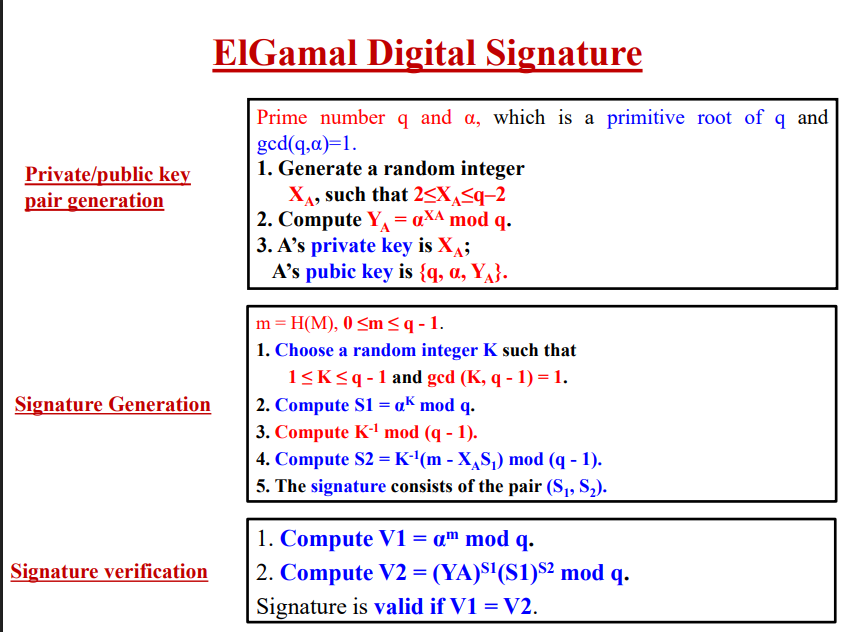

In [28]:
#ELGamal
class Elgamal:
  def __init__(self):
    self.inputs()
    self.calculate_keys()
  def inputs(self):
    # self.q=int(input("Enter value of q: "))
    # self.alpha=int(input("Enter value of alpha: "))
    # self.XA=int(input("Enter private key XA: "))
    self.q,self.alpha,self.XA=19,10,16
  def calculate_keys(self):
    self.YA=pow(self.alpha,self.XA,self.q)
    print(f"Private key is {self.XA}")
    print(f"Public key is ({self.q},{self.alpha},{self.YA})")

  def sign(self,M):
    # k=int(input("Enter random integer k: "))
    k=5
    S1=pow(self.alpha,k,self.q)
    kinverse=pow(k,-1,self.q-1)
    S2=(kinverse*(M-self.XA*S1))%(self.q-1)
    print(f"Signature is ({S1},{S2})")

  def verify(self):
    M=int(input("Enter message M: "))
    S1=int(input("Enter S1: "))
    S2=int(input("Enter S2: "))
    V1=pow(self.alpha,M,self.q)
    v2=((self.YA**S1)*(S1**S2))%self.q
    if V1==v2:
      print("Signature Verifed")


solve=Elgamal()
# message=int(input("Enter message to sign: "))
message=14
solve.sign(message)
solve.verify()


Private key is 16
Public key is (19,10,4)
Signature is (3,4)
Enter message M: 14
Enter S1: 3
Enter S2: 4
Signature Verifed


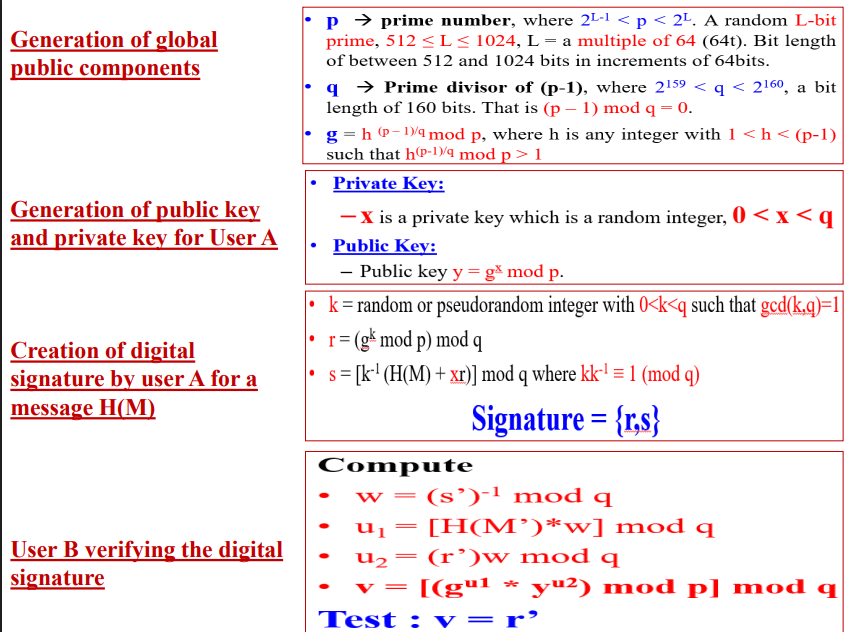

In [ ]:
#DSA



# REST

Remaning

1. Sha md5 hmac
2. dsa sign

Done
1. Caesar , Vigenere, Playfair , hill
2. EC2
3. Elgamal , RSA , DiH , Mim
4. des,
5. RSA , Elgamal signatures


